<h1> 501 Data Pipeline Workshop 9/24 </h1>
<p> Part 1: Data Exploration</p>

In [1]:
##imports- we will be using pandas for data manipulation, and folium for geographic mapping
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt

In [2]:
##import the data from file
cybernetics_data = pd.read_csv ('../CTC_Machine-Generated-Data.csv')

##display the data as spreadsheet
cybernetics_data.head(5)

,Master Filename,Level of Description,Title,Date,Scope and Contents,Creator,Associated Person (Machine Generated),Subject,Location,Format of Material,...,Classification Certainty (Machine Generated),Machine-extracted Feature (Machine Generated),Overall Sentiment (Machine Generated),Percent Positive Sentiment (Machine Generated),Percent Negative Sentiment (Machine Generated),Percent Neutral Sentiment (Machine Generated),Rights,Parent Collection,Repository,Collection Identifier
0,1106834_2_LogicoPhilosophicalCommentsSelfOrg_1...,File,TR No. 5: Some Logico: Philosophical Comments ...,1960,Biological Computer Laboratory Publications in...,"Mullin, A. A.",Wittgenstein||Wiener||Turing||Pask||McCulloch|...,self-organizing systems,Urbana (IL),Publication,...,"Personal, 100.00%||Math, 0.00%||Psychology, 0....",Wittgenstein||Wiener||Turing||Pask||McCulloch|...,0.9975,7.0,2.6,90.4,In Copyright - Educational Use Permitted&&<htt...,"Biological Computer Laboratory Publications, 1...",University of Illinois at Urbana-Champaign. Un...,11/6/834
1,1106834_2_PresentTheorySwitching_1960.pdf,File,TR No. 3: The Present Theory of Switching and ...,1960,Biological Computer Laboratory Publications in...,"Mullin, A. A.",Wiener||Shannon||Pitts||McCulloch,switching circuits,Urbana (IL),Publication,...,"Personal, 100.00%||Math, 0.00%||Psychology, 0....",Wiener||Shannon||Pitts||McCulloch||Biological|...,0.9948,6.8,5.0,88.3,In Copyright - Educational Use Permitted&&<htt...,"Biological Computer Laboratory Publications, 1...",University of Illinois at Urbana-Champaign. Un...,11/6/834
2,1106834_2_LinearPropertyFilters_1962.pdf,File,"TR No. 1 and 2: Linear Property Filters, Alfre...",1962,Biological Computer Laboratory Publications in...,"von Foerster, Heinz||Inselberg, Alfred",Pitts||McCulloch||Maturana||Lettvin,linear systems,Urbana (IL),Publication,...,"Personal, 99.96%||Math, 0.04%||Psychology, 0.0...",Pitts||McCulloch||Maturana||Lettvin||Biologica...,0.9992,8.3,3.8,87.9,In Copyright - Educational Use Permitted&&<htt...,"Biological Computer Laboratory Publications, 1...",University of Illinois at Urbana-Champaign. Un...,11/6/834
3,1106834_2_SelfOrgEnvironments_1960.pdf,File,"Von Foerster, H. : ""On Self-Organizing Systems...",1960,Biological Computer Laboratory Publications in...,"von Foerster, Heinz",Wittgenstein||Shannon||Pask,self-organizing systems,Urbana (IL),Publication,...,"Personal, 100.00%||Math, 0.00%||Psychology, 0....",Man||Learning||Law||Knowledge||Information||Na...,0.9999,16.3,7.6,76.1,In Copyright - Educational Use Permitted&&<htt...,"Biological Computer Laboratory Publications, 1...",University of Illinois at Urbana-Champaign. Un...,11/6/834
4,1106834_2_RealizationOfBiologicalComputers2_19...,File,"The Realization of Biological Computers, Quart...",1958,Biological Computer Laboratory Publications in...,"von Foerster, Heinz",McCulloch||Lettvin,Biological Computer Laboratory (BCL),Urbana (IL),Publication,...,"Personal, 100.00%||Psychology, 0.00%||Math, 0....",McCulloch||Lettvin||Biological||Vision||Techno...,0.9965,8.3,3.8,87.8,In Copyright - Educational Use Permitted&&<htt...,"Biological Computer Laboratory Publications, 1...",University of Illinois at Urbana-Champaign. Un...,11/6/834


In [3]:
##list each column, type of data, and number of unique entries

for i in cybernetics_data.columns:
    print (i)
    print ('Data type: '+ str(cybernetics_data[i].dtype))
    print ('Number of Unique entries: '+ str(cybernetics_data[i].nunique()))
    print ()

Master Filename
Data type: object
Number of Unique entries: 629

Level of Description
Data type: object
Number of Unique entries: 1

Title
Data type: object
Number of Unique entries: 620

Date
Data type: object
Number of Unique entries: 237

Scope and Contents
Data type: object
Number of Unique entries: 5

Creator
Data type: object
Number of Unique entries: 532

Associated Person (Machine Generated)
Data type: object
Number of Unique entries: 191

Subject
Data type: object
Number of Unique entries: 314

Location
Data type: object
Number of Unique entries: 230

Format of Material
Data type: object
Number of Unique entries: 3

Language
Data type: object
Number of Unique entries: 13

Cybernetic Classification (Machine Generated)
Data type: object
Number of Unique entries: 4

Classification Certainty (Machine Generated)
Data type: object
Number of Unique entries: 242

Machine-extracted Feature (Machine Generated)
Data type: object
Number of Unique entries: 382

Overall Sentiment (Machine G

In [7]:
##list the creators of the highest number of documents

##most documents have multiple creators listed, split by "||" so we need to separate them to count
creator_list = []
for i in cybernetics_data['Creator']:
    if not pd.isna(i):
        creator_list.append(i.split('||'))

#turn the list of lists into one list
creator_list = [item for sublist in creator_list for item in sublist]

frequency_table = {}
for item in creator_list:
    frequency_table[item] = frequency_table.get(item, 0) + 1

sorted_items_desc = sorted(frequency_table.items(), key=lambda item: item[1], reverse=True)

sorted_items_desc[:4]

[('von Foerster, Heinz', 288),
 ('McCulloch, Warren S.', 128),
 ('Wiener, Norbert', 88),
 ('Ashby, W. Ross (William Ross)', 36)]

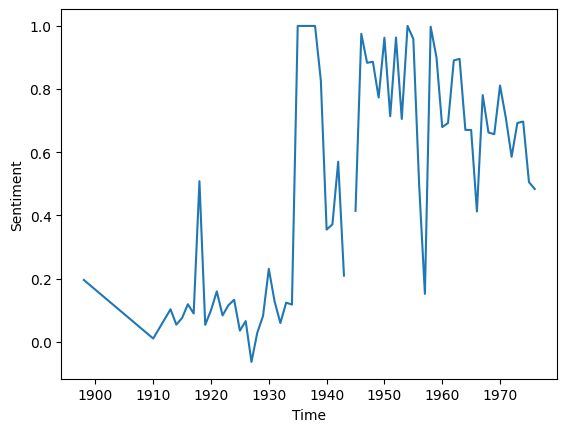

In [8]:
##plot the relationship between two variables
#clean up the dates column to get a single year
cybernetics_data['year'] = cybernetics_data['Date'].str.split('-|\|\|').str.get(0)
cybernetics_data['year'] = cybernetics_data['year'].str.replace(r'[^0-9]', '', regex=True)

# 2. Group by 'Year' and calculate the mean of 'Value'
average_by_year = cybernetics_data.groupby('year')['Overall Sentiment (Machine Generated)'].mean().reset_index()

# x = pd.to_numeric(cybernetics_data['year'])
# y = cybernetics_data['Overall Sentiment (Machine Generated)']
# Create a line plot

x = pd.to_numeric(average_by_year['year'])
y = average_by_year['Overall Sentiment (Machine Generated)']
plt.plot(x, y)

# Add labels and a title
plt.xlabel("Time")
plt.ylabel("Sentiment")

# Display the plot
plt.show()

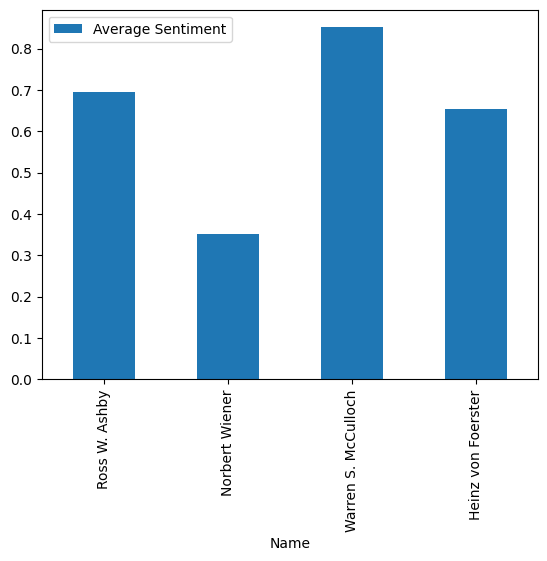

In [9]:
## plot by creator
ashby_df = cybernetics_data[cybernetics_data['Creator'].str.contains('Ashby, W. Ross', na=False)]
wiener_df = cybernetics_data[cybernetics_data['Creator'].str.contains('Wiener, Norbert', na=False)]
mcculloch_df = cybernetics_data[cybernetics_data['Creator'].str.contains('McCulloch, Warren S.', na=False)]
vonfoerster_df = cybernetics_data[cybernetics_data['Creator'].str.contains('von Foerster, Heinz', na=False)]

data = {
    'Name': ['Ross W. Ashby', 'Norbert Wiener', 'Warren S. McCulloch', 'Heinz von Foerster'],
    'Average Sentiment': [ashby_df['Overall Sentiment (Machine Generated)'].mean(), 
                          wiener_df['Overall Sentiment (Machine Generated)'].mean(), 
                          mcculloch_df['Overall Sentiment (Machine Generated)'].mean(), 
                          vonfoerster_df['Overall Sentiment (Machine Generated)'].mean()],
}
creator_df = pd.DataFrame(data)
creator_df.plot.bar(x='Name', y='Average Sentiment')
plt.show()

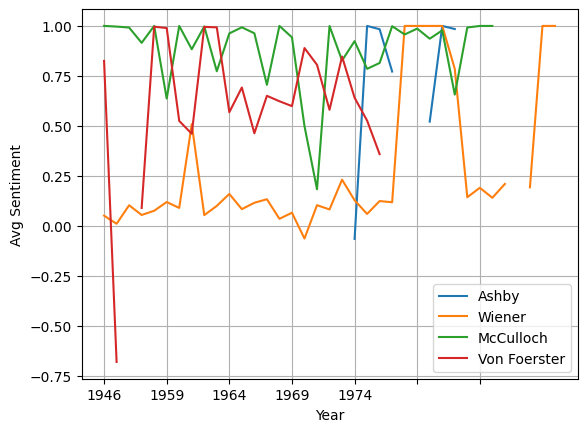

In [10]:
## creator by year

ashby_avg = ashby_df.groupby('year')['Overall Sentiment (Machine Generated)'].mean().reset_index()
wiener_avg = wiener_df.groupby('year')['Overall Sentiment (Machine Generated)'].mean().reset_index()
mcculloch_avg = mcculloch_df.groupby('year')['Overall Sentiment (Machine Generated)'].mean().reset_index()
vonfoerster_avg = vonfoerster_df.groupby('year')['Overall Sentiment (Machine Generated)'].mean().reset_index()

ax = ashby_avg.plot(x='year', y='Overall Sentiment (Machine Generated)', label='Ashby')
wiener_avg.plot(x='year', y='Overall Sentiment (Machine Generated)', label='Wiener', ax=ax)
mcculloch_avg.plot(x='year', y='Overall Sentiment (Machine Generated)', label='McCulloch', ax=ax)
vonfoerster_avg.plot(x='year', y='Overall Sentiment (Machine Generated)', label='Von Foerster', ax=ax)

plt.xlabel('Year')
plt.ylabel('Avg Sentiment')
plt.legend()
plt.grid(True)
plt.show()